In [48]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
dirs = set()
dirs_map = {}
for dirname, _, filenames in os.walk('/kaggle/input'):
    if 'n0' in dirname or 'n1' in dirname:
        dirs.add( dirname.split(sep='/')[-1])
    else:
        print(dirname)
        
print("===========")
dirs = list(dirs)
# dirs = dirs[4:]
dirs.sort()
# print(dirs)

# mapping the ids to the actual id
for i, id_ in enumerate(dirs):
#     print(id_)
    dirs_map[str(i)] = id_
    
print(dirs_map)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input
/kaggle/input/imagenetsketch
/kaggle/input/imagenetsketch/imagenet-sketch
/kaggle/input/imagenetsketch/imagenet-sketch/sketch
/kaggle/input/imagenetsketch/sketch
{'0': 'n01440764', '1': 'n01443537', '2': 'n01484850', '3': 'n01491361', '4': 'n01494475', '5': 'n01496331', '6': 'n01498041', '7': 'n01514668', '8': 'n01514859', '9': 'n01518878', '10': 'n01530575', '11': 'n01531178', '12': 'n01532829', '13': 'n01534433', '14': 'n01537544', '15': 'n01558993', '16': 'n01560419', '17': 'n01580077', '18': 'n01582220', '19': 'n01592084', '20': 'n01601694', '21': 'n01608432', '22': 'n01614925', '23': 'n01616318', '24': 'n01622779', '25': 'n01629819', '26': 'n01630670', '27': 'n01631663', '28': 'n01632458', '29': 'n01632777', '30': 'n01641577', '31': 'n01644373', '32': 'n01644900', '33': 'n01664065', '34': 'n01665541', '35': 'n01667114', '36': 'n01667778', '37': 'n01669191', '38': 'n01675722', '39': 'n01677366', '40': 'n01682714', '41': 'n01685808', '42': 'n01687978', '43': 'n01688243

/kaggle/input/imagenetsketch/sketch/n01440764/


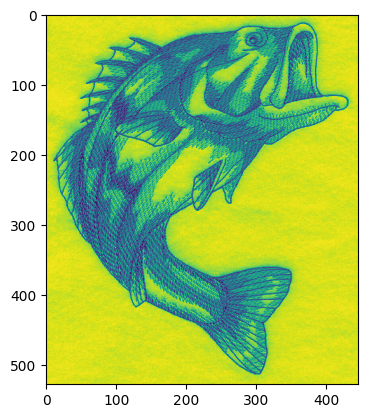

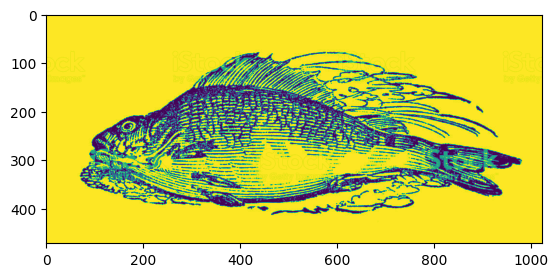

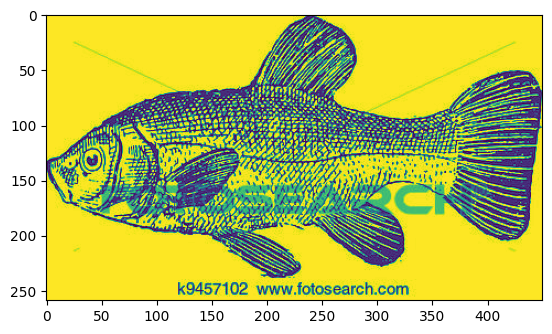

In [53]:
# accessing the sketches
import matplotlib.pyplot as plt
from PIL import Image

pth = "/kaggle/input/imagenetsketch/sketch/" + dirs[0] + "/"
print(pth)

fls = os.listdir(pth)

for i in range(3):
    im_pth = pth + fls[i]
    img = Image.open(im_pth)
    img = img.convert('L')
    img = np.array(img)

    plt.imshow(img)
    plt.show()


In [72]:
classes_id = {"bathtub": [435],"bench":[703], "bed": [564, 831], "bowl":[659, 809],
             "chair": [559, 765, 423], "cup": [504, 572], "desk": [526], "door": [798, 799], 
             "lamp": [846, 619], "piano": [579, 881], "radio": [754, 755], "sofa": [831], 
             "stairs": [865, 826], "table": [532], "tent": [672], "toilet":[861], "vase":[883]}

In [73]:
# saving the new pictures into the new directories as numpy arrays 
class_mapping = {}

for c_name, c_ids in classes_id.items():
    print(f"Processing Class {c_name}.....")
    
    #create a folder if does not exist
    dir_path = f"ImageNetSketchMini/{c_name}/"
    class_mapping[dir_path] = []
    os.makedirs(dir_path, exist_ok=True)
    
    #delete all existing files
    for file_name in os.listdir(dir_path):
        file_path = os.path.join(dir_path, file_name)
        if os.path.isfile(file_path):  # Check if it is a file (not a directory)
            os.remove(file_path)
    
    
    # add all images in all ids of The original dataset to that folder
    img_counter = 0
    for i in c_ids:
        #load the data
        data_pth = "/kaggle/input/imagenetsketch/sketch/" + dirs_map[str(i)] + "/"
        class_mapping[dir_path].append(data_pth)
        #loading all images in that data pth, processing them, then adding them to their respective dir
        for img_f in os.listdir(data_pth):
            if ".JPEG" in img_f:
                img_pth = data_pth + img_f
                #load the image
                img = Image.open(img_pth)
                img = img.convert('L')
                img.save(dir_path + str(img_counter) + ".jpeg")
                img_counter+=1
                
        
    

    

Processing Class bathtub.....
Processing Class bench.....
Processing Class bed.....
Processing Class bowl.....
Processing Class chair.....
Processing Class cup.....
Processing Class desk.....
Processing Class door.....
Processing Class lamp.....
Processing Class piano.....
Processing Class radio.....
Processing Class sofa.....
Processing Class stairs.....
Processing Class table.....
Processing Class tent.....
Processing Class toilet.....
Processing Class vase.....


ImageNetSketchMini/bathtub/
51


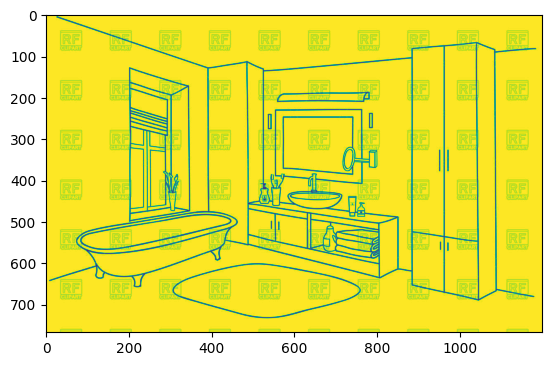

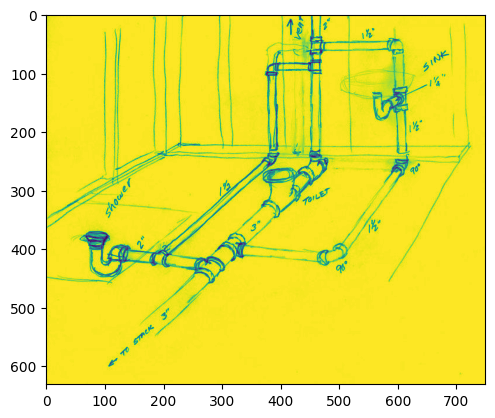

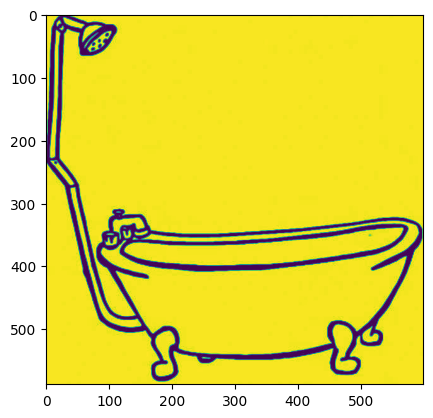

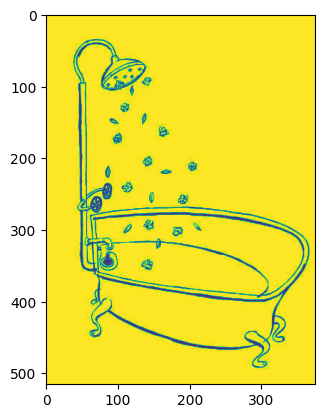

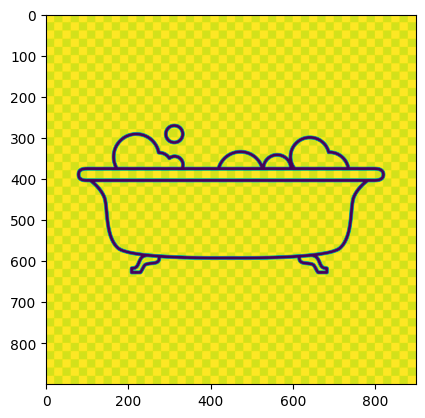

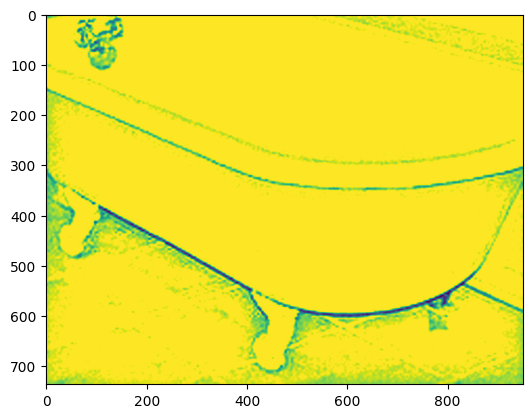

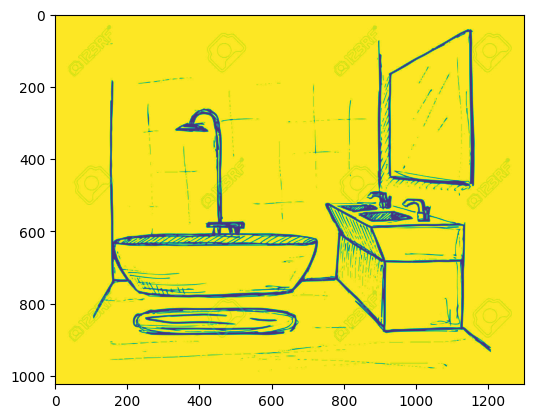

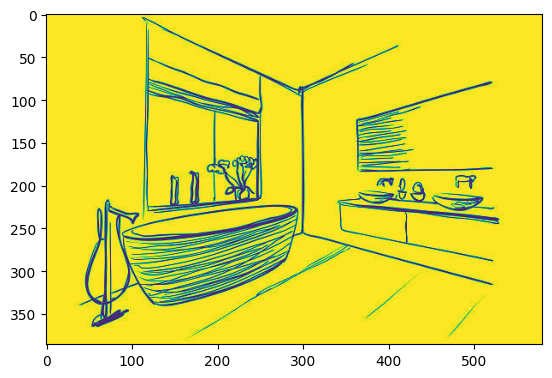

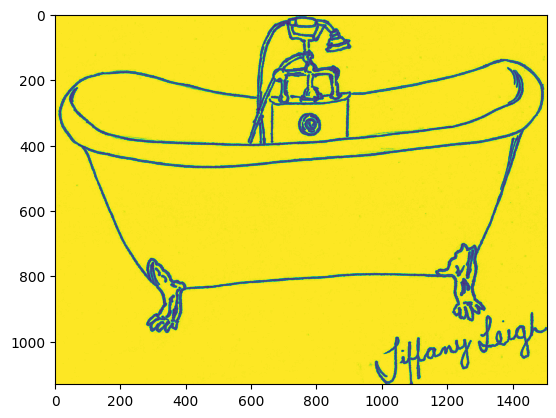

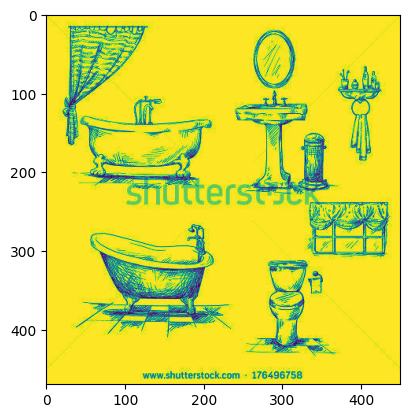

In [77]:
pth = "ImageNetSketchMini/" + list(classes_id.keys())[0] + "/"
print(pth)

fls = os.listdir(pth)
print(len(fls))

for i in range(10):
    im_pth = pth + fls[i]
    img = Image.open(im_pth)
    img = img.convert('L')
    img = np.array(img)

    plt.imshow(img)
    plt.show()

In [75]:
class_mapping

{'ImageNetSketchMini/bathtub/': ['/kaggle/input/imagenetsketch/sketch/n02808440/'],
 'ImageNetSketchMini/bench/': ['/kaggle/input/imagenetsketch/sketch/n03891251/'],
 'ImageNetSketchMini/bed/': ['/kaggle/input/imagenetsketch/sketch/n03388549/',
  '/kaggle/input/imagenetsketch/sketch/n04344873/'],
 'ImageNetSketchMini/bowl/': ['/kaggle/input/imagenetsketch/sketch/n03775546/',
  '/kaggle/input/imagenetsketch/sketch/n04263257/'],
 'ImageNetSketchMini/chair/': ['/kaggle/input/imagenetsketch/sketch/n03376595/',
  '/kaggle/input/imagenetsketch/sketch/n04099969/',
  '/kaggle/input/imagenetsketch/sketch/n02791124/'],
 'ImageNetSketchMini/cup/': ['/kaggle/input/imagenetsketch/sketch/n03063599/',
  '/kaggle/input/imagenetsketch/sketch/n03443371/'],
 'ImageNetSketchMini/desk/': ['/kaggle/input/imagenetsketch/sketch/n03179701/'],
 'ImageNetSketchMini/door/': ['/kaggle/input/imagenetsketch/sketch/n04238763/',
  '/kaggle/input/imagenetsketch/sketch/n04239074/'],
 'ImageNetSketchMini/lamp/': ['/kaggl

In [76]:
dirs_map['453']

'n02870880'

In [78]:
import os
import subprocess
from IPython.display import FileLink, display

def download_file(path, download_file_name):
    os.chdir('/kaggle/working/')
    zip_name = f"/kaggle/working/{download_file_name}.zip"
    command = f"zip {zip_name} {path} -r"
    result = subprocess.run(command, shell=True, capture_output=True, text=True)
    if result.returncode != 0:
        print("Unable to run zip command!")
        print(result.stderr)
        return
    display(FileLink(f'{download_file_name}.zip'))

In [79]:
download_file('/kaggle/working/ImageNetSketchMini', 'ImageNetSketchMini')


/kaggle/working/ImageNetSketchMini.zip